Enter the length as an integer: 8
Enter the height as an integer: 5
Enter number of triangles you want displayed: 8
VERTICES OF THE TRIANGLES:  

Coordinates of Vertice  1 :  [(0, 0), (0, 5), (227/100, 106/25)]
Coordinates of Vertice  2 :  [(0, 5), (8, 5), (227/100, 106/25)]
Coordinates of Vertice  3 :  [(0, 0), (227/100, 106/25), (136/25, 4/5)]
Coordinates of Vertice  4 :  [(0, 0), (8, 0), (136/25, 4/5)]
Coordinates of Vertice  5 :  [(227/100, 106/25), (8, 5), (136/25, 4/5)]
Coordinates of Vertice  6 :  [(136/25, 4/5), (8, 0), (38/5, 29/50)]
Coordinates of Vertice  7 :  [(136/25, 4/5), (8, 5), (38/5, 29/50)]
Coordinates of Vertice  8 :  [(8, 0), (8, 5), (38/5, 29/50)]


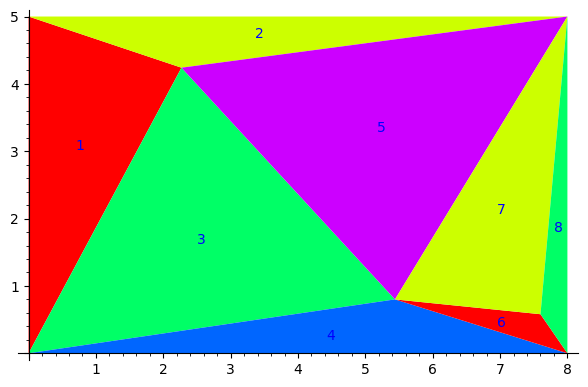


 LISTING THE SHARED EDGES: 
The vertex:  [(0, 0), (227/100, 106/25)]  is shared by triangles:  1  and  3
The vertex:  [(0, 5), (227/100, 106/25)]  is shared by triangles:  1  and  2
The vertex:  [(227/100, 106/25), (8, 5)]  is shared by triangles:  2  and  5
The vertex:  [(0, 0), (136/25, 4/5)]  is shared by triangles:  3  and  4
The vertex:  [(227/100, 106/25), (136/25, 4/5)]  is shared by triangles:  3  and  5
The vertex:  [(136/25, 4/5), (8, 0)]  is shared by triangles:  4  and  6
The vertex:  [(136/25, 4/5), (8, 5)]  is shared by triangles:  5  and  7
The vertex:  [(136/25, 4/5), (38/5, 29/50)]  is shared by triangles:  6  and  7
The vertex:  [(38/5, 29/50), (8, 0)]  is shared by triangles:  6  and  8
The vertex:  [(38/5, 29/50), (8, 5)]  is shared by triangles:  7  and  8


In [17]:
#Take input from user
length = int(input("Enter the length as an integer: "))
height = int(input("Enter the height as an integer: "))
no_of_triangles = int(input("Enter number of triangles you want displayed: "))


#DEFINE THE POINT LIST as a set of tuples
Point_list = [(0,0),(0,height),(length,height),(length,0)]

#DEFINE SUPER TRIANGLE
super_triangle = [(-100,-100),(-100,50),(100,-10)]

#variable to store no of points in delaunay to generate required number of triangles
no_of_points = 0
if is_even(no_of_triangles):
    no_of_points = (no_of_triangles + 6)/2 - 4
else:
    no_of_points = (no_of_triangles + 7)/2 - 5
    Point_list.append((0,height/2))
    
for a in range(no_of_points):
    Point_list.append(((int(90*length*random()+7.2*length)/100),(int(90*height*random()+7.2*height)/100)))


#add the 1st triangle to the triangle list
triangles = [super_triangle]


#Variables defined till now:


#DEFINING FUNCTIONS:

#FUNCTION to create a mesh of position tuples from triangles list
#triangles list should be a list with triangle vertice coordinates stored as tuples
def triangle_list_to_mesh(triangles):
    temp_mesh = Graph()
    for triangle_iter in triangles:
        temp_mesh.add_vertices(triangle_iter)
        temp_vertice_pairs = Combinations(triangle_iter,2).list()
        temp_mesh.add_edges(list(tuple(sub) for sub in temp_vertice_pairs))
    return temp_mesh


#FUNCTION to test if edge is unique, i.e is whether shared by 2 triangles in the mesh
def unique_edge(edge,mesh):
    paths = list(mesh.shortest_simple_paths(edge[0],edge[1]))
    possible_triangle_with_unique_edge = list(filter(lambda x: len(x)==3,paths))
    if len(possible_triangle_with_unique_edge) == 1:
        return True
    else:
        return False

#FUNCTION to delete bad triangles from triangle list
def delete_bad_triangles(triangles,bad_triangles):
    for bad_boy in bad_triangles:
        BTindex = triangles.index(bad_boy)
        triangles.pop(BTindex)

#FUNCTION to delete triangles with vertices from supertriangle
def delete_super_triangles(triangles,super_triangle):
    indices_to_pop = []
    for triangle in triangles:
        pop_index = False
        for vertex in triangle:
            for super_vertex in super_triangle:
                if super_vertex == vertex:
                    pop_index = True
                    
        if pop_index == True:
            indices_to_pop.append(triangles.index(triangle))
    
    for popper in reversed(indices_to_pop):
        triangles.pop(popper)
        
#FUNCTION to sort the edges of a list containing the edges of triangles
def edge_sorter(Triangle_edges_list):
    sorted_triangle_edges = []
    for a in Triangle_edges_list:
        sorted_list = []
        for b in a:
            sorted_list.append(sorted(b))
        sorted_triangle_edges.append(sorted_list)
    return sorted_triangle_edges

#FUNCTION to generate list of edges of a triangle from list of vertices
def vertex_to_edge_list(TriangleList):
    Triangle_edges_list = []
    for triangle_iter in TriangleList:
        temp_vertice_pairs = Combinations(triangle_iter,2).list()
        Triangle_edges_list.append(list(tuple(sub) for sub in temp_vertice_pairs))
    return Triangle_edges_list

def generate_shared_edges(Triangle_edges_list):
    shared_edges = []
    for tri in Triangle_edges_list:
        for edge in tri:
            try:
                x = [x for x in shared_edges if edge in x][0]
                edge_index = shared_edges.index(x)
                shared_edges[edge_index].append(Triangle_edges_list.index(tri)) 
                
            except Exception as e:
                shared_edges.append([])
                shared_edges[shared_edges.index([])].append(edge)
                shared_edges[shared_edges.index([edge])].append(Triangle_edges_list.index(tri))
                   #dictionary of list containing triangles the vertex shares
    shared_edges = list(filter(lambda x: len(x)==3,shared_edges))
    return shared_edges
    


#loop to iterate over each point(tuple) in point_list
for point in Point_list:
    bad_triangles = []
    
    #loop to compute bad triangles and remove bad triangels from main triangle structure(NOT YET REMOVED BAD)
    for triang in triangles:
        #command to find circumcentre of triangle given points
        c = Polyhedron(vertices = triang).is_inscribed(certificate = True)
        #command to find circumradius:
        circumradius = (c[1]-vector(triang[0])).norm()
        dist_of_point = (vector(point)-vector(c[1])).norm()
        if dist_of_point <= circumradius:
            bad_triangles.append(triang)
    
    #deleting the bad triangles from the list containing triangles
    delete_bad_triangles(triangles,bad_triangles)
    
    
    #variable to add unique edges in bad triangles to polygon
    poly1 = []
    mesh = Graph()
    
    #Form the mesh and edges variables from the bad triangles stored as list
    mesh = triangle_list_to_mesh(bad_triangles)
        
    #generate the graph and create edges from vertices of triangles in bad triangles(TO CREATE- mesh)
    edges = mesh.edges()
    #mesh.show()
    for test_edge in edges:
        if unique_edge(test_edge,mesh):
            #add the line formed by edge to list of lines assuming that the edges added dont already exist on poly1
            #l1 = line([mesh.get_vertex(test_edge[0]),mesh.get_vertex(test_edge[1])])
            poly1.append([test_edge[0],test_edge[1]])
    
    for lines in poly1:
        new_triangle = [lines[0],lines[1],point]
        #assuming that the triangle doesn't already exist in the list(proved it can't)
        triangles.append(new_triangle)
    
#Delete triangles with vertices from super triangle
delete_super_triangles(triangles,super_triangle)

#function to plot lines in space and list vertices
print("VERTICES OF THE TRIANGLES: ", "\n")
i = 0
j = 1
G = Graphics()
for a in triangles:    
    Poly1 = Polyhedron(vertices = a)
    c = Poly1.center()
    G = G + polygon(a, rgbcolor = hue(i)) + text(j, c)
    print("Coordinates of Vertice ", j, ": ", a)
    i += 0.2
    j += 1
    
G.show()

#List the shared edges and which triangles are sharing them
Triangle_edges_list = vertex_to_edge_list(triangles)
Triangle_edges_list = edge_sorter(Triangle_edges_list)
shared_edges = generate_shared_edges(Triangle_edges_list) 

print("\n", "LISTING THE SHARED EDGES: ")
for edge in shared_edges:
    print("The vertex: ", edge[0], " is shared by triangles: ", edge[1] + 1, " and ", edge[2] + 1)